<a href="https://colab.research.google.com/github/jacr2006/tensorflow/blob/master/convulational_neural_network_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Red Neuronal Convolucional - CNN

El propósito de este notebook es entrenar una red neuronal convolucional para un problema de clasificación multiclase de digitos escritos a mano. Finalmente se tratará de inferir la clase a la que pertenece una imagen de un digito escritos a mano con el modelo obtenido. Para el entrenamiento usaremos el dataset MNIST conformado por 60.000 imagenes de entrenamiento y 10.000 imagenes de prueba.

Este dataset esta disponible en la libreria "tensorflow_datasets" de tensorflow.

In [0]:
!pip install -q tensorflow tensorflow-datasets matplotlib tensorboardcolab

Importar las librerias necesarias

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

Limpia graficos anteriores de tensorboard

In [0]:
tf.reset_default_graph()

###Datos
En este dataset la data de entrada es un conjunto imagenes que estan centradas y estandarizadas en tamaño (28X28x1 pixels, en blanco y negro), no es requerida limpieza de los datos. La data de salida esta conformada por un conjuto finito de datos etiquetados entre el valor 0 y el 9, data categórica.
Lectura de los datos de entrenamiento

In [832]:
train_ds = tfds.load("mnist", split=tfds.Split.TRAIN, batch_size=-1)
numpy_ds = tfds.as_numpy(train_ds)
numpy_images, numpy_labels = numpy_ds["image"], numpy_ds["label"]

In [833]:
numpy_images.shape

(60000, 28, 28, 1)

Como la entrada a la CNN debe ser de una dimension, se requiere una transformacion de la data de entrada de 60000x28x28x1 a 60000x784

In [0]:
width = 28 # ancho de la imagen en pixels
height = 28 # altura de la imagen en pixels
flat = width * height # numero de pixels de la imagen
class_output = 10 # numero de clases

In [0]:
numpy_images=numpy_images.reshape(60000,flat)

In [836]:
numpy_images.shape

(60000, 784)

La siguiente figura muestra la imagen de un numero perteneciente al conjunto de entrenamiento

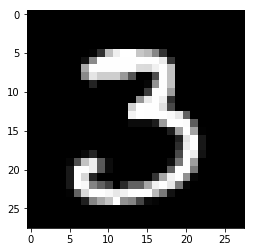

In [837]:
image_index = 77
img=numpy_images[image_index].reshape(width,height)
plt.imshow(img, cmap="gray")

In [838]:
numpy_labels.shape

(60000,)

Lectura de los datos de prueba

In [0]:
test_ds = tfds.load("mnist", split=tfds.Split.TEST, batch_size=-1)
numpy_ds_test = tfds.as_numpy(test_ds)
numpy_images_test, numpy_labels_test = numpy_ds_test["image"], numpy_ds_test["label"]

In [840]:
numpy_images_test.shape

(10000, 28, 28, 1)

In [841]:
numpy_images_test=numpy_images_test.reshape(10000,flat)
numpy_images_test.shape

(10000, 784)

In [842]:
sess = tf.InteractiveSession()#se crea una sesion interativa, ideal para notebooks

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Los algoritmos de "machine learning" no funcionan bien con data categorica directamente. Por tanto, se deben codificar estas categorias numéricas en vectores binarios. Para este caso donde existen 10 clases de salida representadas por un valor decimal entre 0 y 9. Se codificaran en un vector binario 1x10 donde solo existe una columna con un valor 1 mientras el resto son 0.

In [0]:
numpy_labels=tf.one_hot(numpy_labels, depth=class_output)
labels=sess.run(numpy_labels)

In [844]:
labels.shape

(60000, 10)

Se realiza la misma codificación para el conjunto de prueba

In [0]:
numpy_labels_test=tf.one_hot(numpy_labels_test, depth=class_output)
labels_test=sess.run(numpy_labels_test)

In [846]:
labels_test.shape

(10000, 10)

###Entrenamiento

La arquitectura de la CNN que se usará es la siguiente:

*   (Input) -> [batch_size, 28, 28, 1] >> Applicando 32 filtros de [5x5]
*   (Convolutional layer 1) -> [batch_size, 28, 28, 32]
*   (ReLU 1) -> [?, 28, 28, 32]
*   (Max pooling 1) -> [?, 14, 14, 32]
*   (Convolutional layer 2) -> [?, 14, 14, 64]
*   (ReLU 2) -> [?, 14, 14, 64]
*   (Max pooling 2) -> [?, 7, 7, 64]
*   (fully connected layer 3) -> [1x1024]
*   (ReLU 3) -> [1x1024]
*   (Drop out) -> [1x1024]
*   (fully connected layer 4) -> [1x10]



Se crean "placeHolders" para la variables de entrada (x) y la de salida (y_).

In [0]:
x  = tf.placeholder(tf.float32, shape=[None, flat], name="x")
y_ = tf.placeholder(tf.float32, shape=[None, class_output], name="y_")

In [848]:
x_image = tf.reshape(x, [-1,28,28,1])  
x_image

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

####Convolutional Layer 1


In [0]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.01), name="w1")
b_conv1 = tf.Variable(tf.constant(0.01, shape=[32]), name="b1") 
#new_W_conv1=tf.reduce_mean(W_conv1)
#new_b_conv1=tf.reduce_mean(b_conv1)

In [0]:
with tf.name_scope('convolution_layer_1'):
  convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1
  h_conv1 = tf.nn.relu(convolve1)
  conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name="convolution") #max_pool_2x2
  conv1

####Convolutional Layer 2

In [0]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.01), name="w2")
b_conv2 = tf.Variable(tf.constant(0.01, shape=[64]), name="b2") 
#new_W_conv2=tf.reduce_mean(W_conv2)
#new_b_conv2=tf.reduce_mean(b_conv2)

In [0]:
with tf.name_scope('convolution_layer_2'):
  convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2
  h_conv2 = tf.nn.relu(convolve2)
  conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name="convolution") #max_pool_2x2
  conv2

####Fully Connected Layer

In [0]:
layer2_matrix = tf.reshape(conv2, [-1, 7 * 7 * 64])

In [0]:
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.01), name="w3")
b_fc1 = tf.Variable(tf.constant(0.01, shape=[1024]), name="b3")
#new_W_fc1=tf.reduce_mean(W_fc1)
#new_b_fc1=tf.reduce_mean(b_fc1)

In [0]:
with tf.name_scope('fully_connected_layer'):
  fcl = tf.matmul(layer2_matrix, W_fc1) + b_fc1
  h_fc1 = tf.nn.relu(fcl, name="fully_connected")
  h_fc1

####Dropout Layer

In [0]:
keep_prob = tf.placeholder(tf.float32)
with tf.name_scope('dropout_layer'):
  layer_drop = tf.nn.dropout(h_fc1, keep_prob, name="dropout")
  layer_drop

####Softmax Layer

In [0]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.01), name="w4") 
b_fc2 = tf.Variable(tf.constant(0.01, shape=[10]), name="b4") 
#new_W_fc2=tf.reduce_mean(W_fc2)
#new_b_fc2=tf.reduce_mean(b_fc2)

In [0]:
with tf.name_scope('softmax_layer'):
  fc=tf.matmul(layer_drop, W_fc2) + b_fc2
  y_CNN= tf.nn.softmax(fc, name="softmax")
  y_CNN

Se crea un objeto tensorboard que crea un link donde se visualizará el flujo del grafico, y graficas del costo y la precision

In [859]:
from tensorboardcolab import * 
tbc = TensorBoardColab() 
writer = tbc.get_writer()

Wait for 8 seconds...
TensorBoard link:
http://366fc4df.ngrok.io


In [0]:
with tf.name_scope('cost'):
  cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))
  tf_loss_summary = tf.summary.scalar('loss', cross_entropy)#se crea un escalar de la funcion de costos

Para este caso, se usa Adam Optimizer como algoritmo de optimización

In [0]:
with tf.name_scope('optimization'):
  train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [0]:
with tf.name_scope('accuracy'):
  correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  tf_acc_summary = tf.summary.scalar('accuracy', accuracy)#se crea un escalar de la precision

performance = tf.summary.merge([tf_loss_summary, tf_acc_summary])

In [0]:
sess.run(tf.global_variables_initializer())

Se ejecutan un conjunto finito de iteraciones, y se analiza la convergencia mediendo la diferencia entre dos sucesivos valores de costo

In [864]:
batch_size = 60
cost=0
with tf.name_scope('training'):
  for i, j in zip( range(1000), range(int(len(numpy_images)/batch_size)) ):
    batch_images = numpy_images[j*batch_size : (j+1)*batch_size]#realizamos al entrenamiento en lotes para evitar sobrecarga de memoria
    batch_labels = labels[j*batch_size : (j+1)*batch_size]

    _,new_cross_entropy = sess.run([train_step, cross_entropy], feed_dict={x: batch_images, y_: batch_labels, keep_prob: 0.5} )
    #_,new_cross_entropy, _W_conv1, _b_conv1, _W_conv2, _b_conv2, _W_fc1, _b_fc1, _W_fc2, _b_fc2 = sess.run([train_step, cross_entropy, new_W_conv1, new_b_conv1, new_W_conv2, new_b_conv2, new_W_fc1, new_b_fc1, new_W_fc2, new_b_fc2], feed_dict={x: batch_images, y_: batch_labels, keep_prob: 0.5} )
    diff=abs(cost-new_cross_entropy)
    cost=new_cross_entropy

    summ = sess.run(performance, feed_dict={x: batch_images, y_: batch_labels, keep_prob: 0.5})
    writer.add_summary(summ, i)    

    if i%50 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch_images, y_: batch_labels, keep_prob: 0.5})
      print("step:{}, cost:{}, training accuracy:{}".format(i, new_cross_entropy, float(train_accuracy)*100) )
      #print("step:{}, cost:{}, training accuracy:{}, W_conv1:{}, b_conv1:{}, W_conv2:{}, b_conv2:{}, _W_fc1:{}, _b_fc1:{}, _W_fc2:{}, _b_fc2:{}".format(i, new_cross_entropy, float(train_accuracy), _W_conv1, _b_conv1, _W_conv2, _b_conv2, _W_fc1, _b_fc1, _W_fc2, _b_fc2) )

    if i > 1 and diff < .00001:#usamos un criterio de convergencia de 10-5 para finalizar el entrenamiento
        print("El entrenamiento converge")
        break

writer.add_graph(tf.get_default_graph())
writer.flush()        

step:0, cost:2.3108530044555664, training accuracy:16.66666716337204
step:50, cost:0.5799815058708191, training accuracy:88.33333253860474
step:100, cost:0.41434016823768616, training accuracy:88.33333253860474
step:150, cost:0.1079225242137909, training accuracy:93.33333373069763
step:200, cost:0.226412832736969, training accuracy:94.9999988079071
step:250, cost:0.13748188316822052, training accuracy:96.66666388511658
step:300, cost:0.13523171842098236, training accuracy:94.9999988079071
step:350, cost:0.15316060185432434, training accuracy:94.9999988079071
step:400, cost:0.07516706734895706, training accuracy:94.9999988079071
step:450, cost:0.08998653292655945, training accuracy:98.33333492279053
step:500, cost:0.161916121840477, training accuracy:98.33333492279053
step:550, cost:0.09033969044685364, training accuracy:96.66666388511658
step:600, cost:0.0630493313074112, training accuracy:98.33333492279053
step:650, cost:0.07065095752477646, training accuracy:96.66666388511658
step:70

In [0]:
sess.close() 